<a href="https://colab.research.google.com/github/V2X-Hub/LV_Grid_Simulation/blob/main/European_LV_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install dss-python library**

In [1]:
!pip install dss-python
#This line uses the !pip command, which allows you to run pip package manager commands directly within a Jupyter notebook cell.
#It installs the dss-python library, which is a Python interface to the OpenDSS power system simulation software.
#This library provides the tools to interact with and control the OpenDSS engine from Python.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 2.3 MB/s eta 0:00:00


**Import the dss package and innitialize the OpenDSS engine**

In [2]:
import os
import shutil
import requests
import dss          # Import dss
DSS = dss.DSS       # Initialize the OpenDSS engine and assigns it to the variable DSS
#Here, the code first imports the os and also the dss package that was just installed.
#Then, it initializes the OpenDSS engine by calling dss.DSS. The initialized engine is assigned to the variable DSS.
#This DSS variable will be used throughout the rest of the notebook to interact with the OpenDSS simulation environment.

**Import files from github and compile**

In [3]:
# # @Mahyar: Could you please put all the data in a folder in the same directory that we have the code so to make it straighforward? Thank you.
!rm -rf *     # This command is executed first and removes all existing files and directories in the current working directory. This ensures a clean slate before downloading the necessary files.
# for i in range(1,101):     # Import all 100 load_profile.txt data files (@Mahyar: Please explain about the need for 100 load profile here.)
#   !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Daily_1min_100profiles/load_profile_{i}.txt

# !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Buscoords.txt              # Import Buscoords.txt file
# !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/LineCode.txt               # Import LineCode.txt file
# !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Lines.txt                  # Import Lines.txt file
# !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/LoadShapes.txt             # Import LoadShapes.txt file
# !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Loads.txt                  # Import Loads.txt file
# !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Monitors.txt               # Import Monitors.txt file
# !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Transformers.txt           # Import Transformers.txt file
# !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Voltage_Bases_DSS.DSS      # Import Voltage_Bases_DSS.DSS
# !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Master.dss                 # Import Master.dss

for i in range(1, 101):
  filename = f"load_profile_{i}.txt"
  if not os.path.exists(filename):
    # !wget https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Daily_1min_100profiles/{filename}
    !wget https://sourceforge.net/p/electricdss/code/HEAD/tree/trunk/Version8/Distrib/IEEETestCases/LVTestCase/Daily_1min_100profiles/{filename}

files_to_download = [
  "Buscoords.txt",
  "LineCode.txt",
  "Lines.txt",
  "LoadShapes.txt",
  "Loads.txt",
  "Monitors.txt",
  "Transformers.txt",
  "Voltage_Bases_DSS.DSS",
  "Master.dss"
]

# base_url = "https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/"
base_url = "https://sourceforge.net/p/electricdss/code/HEAD/tree/trunk/Version8/Distrib/IEEETestCases/LVTestCase/"

for fname in files_to_download:
  if not os.path.exists(fname):
    !wget {base_url}{fname}

--2025-06-13 09:22:42--  https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Daily_1min_100profiles/load_profile_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12803 (13K) [text/plain]
Saving to: ‘load_profile_1.txt’

load_profile_1.txt  100%[===================>]  12.50K  --.-KB/s    in 0.002s  

2025-06-13 09:22:42 (4.98 MB/s) - ‘load_profile_1.txt’ saved [12803/12803]

--2025-06-13 09:22:42--  https://raw.githubusercontent.com/MahyarLasemi/Test-repo-for-OpenDSS/European-Low-Voltage-System/Daily_1min_100profiles/load_profile_2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuser

**Compile the dss file**

In [5]:
Main_file = "Master.dss"     # Put the main dss file to 'Main_file' parameter
DSS.Text.Command = f'Compile "{Main_file}"'     # Compile the main dss file
print("Compiled the DSS model.")     # Print this line to ensure the DSS file is compiled successfully

Compiled the DSS model.


**Solve LV grid power flow**

In [6]:
if DSS.Text.Command != "Solve":
    DSS.Text.Command = "Solve"  # Execute power flow solution only if not already solved
print("Power flow calculation completed successfully.")

Power flow calculation completed successfully.


**Show the output**

In [7]:
S_total = DSS.ActiveCircuit.TotalPower     # Call and put the apparent power into "S_total"
print(f'Apparent power: {S_total}')     # Print the value of total apparent power
print(f"Total Active Power (kW): {S_total[0]:.2f}")     # Print the value of total active power
print(f"Total Reactive Power (kVAR): {S_total[1]:.2f}")          # Print the value of total reactive power

# Print voltages at each bus
print("\nBus Voltages:")
V_Total = []
for bus_name in DSS.ActiveCircuit.AllBusNames:
    DSS.ActiveCircuit.SetActiveBus(bus_name)     # Call the related bus data in each iteration
    VmagAngle = DSS.ActiveCircuit.Buses.VMagAngle  # [V1, 𝜑1, V2, 𝜑2, ...]
    V_Total.append(VmagAngle)
    print(f"{bus_name}: {VmagAngle}")     # print the 3-phase voltage of related bus in each iteration


Apparent power: [-58.99377833 -19.42813675]
Total Active Power (kW): -58.99
Total Reactive Power (kVAR): -19.43

Bus Voltages:
sourcebus: [ 6.66439269e+03 -5.11482804e-02  6.66478836e+03 -1.20042444e+02
  6.66546737e+03  1.19950259e+02]
1: [ 251.72856643  -30.22306363  251.73106519 -150.19948132  251.83473558
   89.83348588]
2: [ 251.67786545  -30.21970653  251.68526503 -150.19974162  251.81055666
   89.83475332]
3: [ 251.6725502   -30.21935451  251.68046352 -150.19976891  251.80802185
   89.83488621]
4: [ 251.66757067  -30.21902471  251.67596526 -150.19979448  251.80564712
   89.8350107 ]
5: [ 251.66322923  -30.21873715  251.67204342 -150.19981678  251.80357671
   89.83511925]
6: [ 251.65638978  -30.21828413  251.66586499 -150.1998519   251.80031499
   89.83529026]
7: [ 251.19069112  -30.18737695  251.24514197 -150.20224783  251.57821211
   89.8469454 ]
8: [ 251.1698349   -30.18598998  251.22629844 -150.20235532  251.5682647
   89.84746789]
9: [ 251.15247599  -30.18483541  251.2106146

In [9]:
del V_Total[0]

Vmag1 = []
Vmag2 = []
Vmag3 = []
VAngle1 = []
VAngle2 = []
VAngle3 = []

for i in range(len(V_Total)):
   Vmag1.append(V_Total[i][0])
   Vmag2.append(V_Total[i][2])
   Vmag3.append(V_Total[i][4])
   VAngle1.append(V_Total[i][1])
   VAngle2.append(V_Total[i][3])
   VAngle3.append(V_Total[i][5])

Vmag1 = [float(x) for x in Vmag1]
Vmag2 = [float(x) for x in Vmag2]
Vmag3 = [float(x) for x in Vmag3]
VAngle1 = [float(x) for x in VAngle1]
VAngle2 = [float(x) for x in VAngle2]
VAngle3 = [float(x) for x in VAngle3]

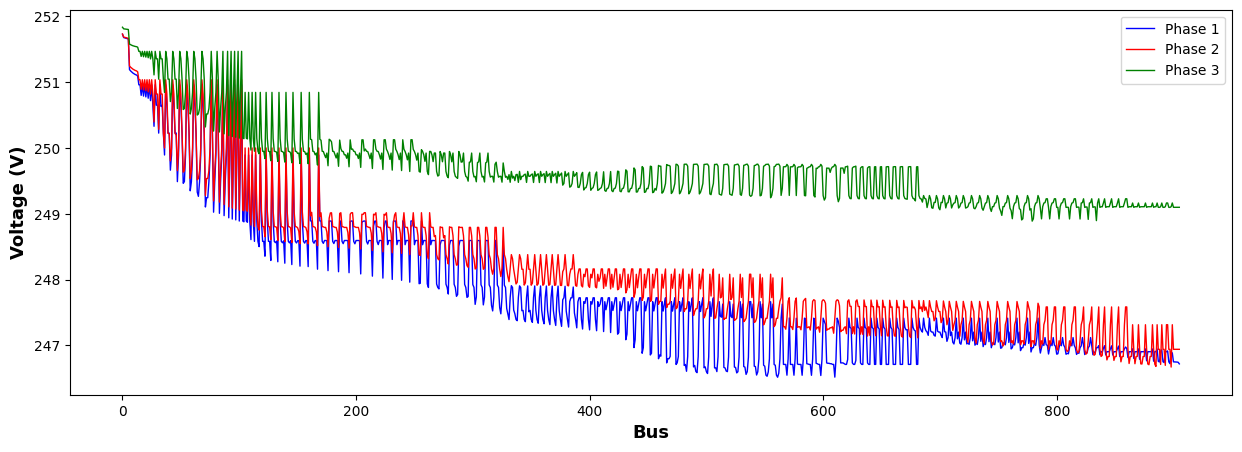

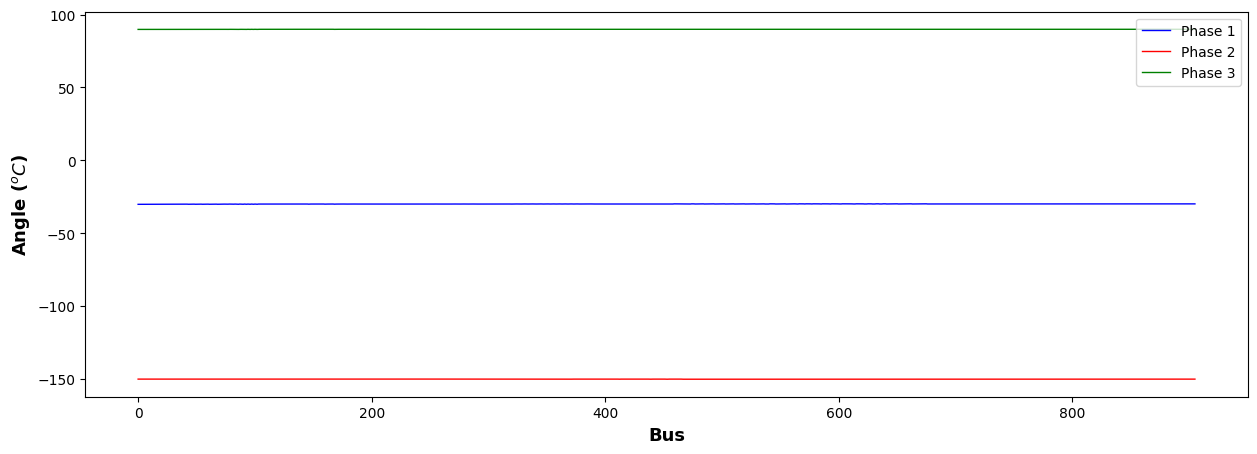

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

font1 = {"size":13 , "weight":"bold"}
font2 = {"size":13 , "weight":"bold"}

x = range(len(Vmag1))

fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(x, Vmag1, linewidth=1, color='blue', label='Phase 1')
ax1.plot(x, Vmag2, linewidth=1, color='red', label='Phase 2')
ax1.plot(x, Vmag3, linewidth=1, color='green', label='Phase 3')
ax1.set_xlabel('Bus', fontdict=font1)
ax1.set_ylabel('Voltage (V)', fontdict=font1)
ax1.legend()
plt.show()

fig, ax2 = plt.subplots(figsize=(15, 5))
ax2.plot(x, VAngle1, linewidth=1, color='blue', label='Phase 1')
ax2.plot(x, VAngle2, linewidth=1, color='red', label='Phase 2')
ax2.plot(x, VAngle3, linewidth=1, color='green', label='Phase 3')
ax2.set_xlabel('Bus', fontdict=font1)
ax2.set_ylabel('Angle ($^oC$)', fontdict=font1)
ax2.legend()
plt.show()